# K-Means Clustering
# Customer Segmentation for Targeted Marketing

In today’s competitive e-commerce landscape, personalized marketing strategies are essential for building customer loyalty and driving sales. Customer segmentation, powered by unsupervised clustering algorithms, enables businesses to identify distinct groups within their customer base based on purchasing behavior, preferences, and other relevant factors.

This project focuses on utilizing clustering techniques to analyze the *Online Retail Dataset* (a transactional dataset from a UK-based non-store online retailer) to discover meaningful customer segments. The dataset contains transaction details, including product descriptions, quantities purchased, invoice dates, customer IDs, and geographical locations. By identifying unique customer segments, the company can implement tailored marketing campaigns and optimize its overall business strategy.

---

## Objective
The primary objective is to segment customers into meaningful clusters based on their purchasing behavior. These clusters will help the company:
- Design targeted marketing campaigns for specific customer groups.
- Identify high-value customers to prioritize for loyalty programs.
- Uncover purchasing trends and patterns across different regions.
- Improve inventory planning by understanding customer demand patterns.

---

## Dataset Description
The dataset contains the following key attributes:
- **InvoiceNo**: Unique identifier for each transaction.
- **StockCode**: Unique identifier for products.
- **Description**: Product description.
- **Quantity**: Number of products purchased.
- **InvoiceDate**: Date and time of the transaction.
- **UnitPrice**: Price per product unit.
- **CustomerID**: Unique identifier for customers.
- **Country**: Country of the customer.

---

## Analysis Plan

#### 1. Read and Understand the Data
- Load the dataset into a pandas DataFrame.
- Explore the dataset to understand its structure, column meanings, and unique values.
- Identify the presence of missing or inconsistent data.

#### 2. Data Cleaning
- Handle missing values (e.g., drop rows with missing `CustomerID` or impute missing data where appropriate).
- Remove duplicate records, if any.
- Filter out records with invalid or negative quantities and unit prices (e.g., cancellations, returns).
- Parse and convert dates to a standard format for time-based analysis.

#### 3. Data Preparation for Modeling
- **Feature Engineering**:
  - Compute **TotalSales** for each transaction: `TotalSales = Quantity * UnitPrice`.
  - Aggregate data to create customer-level metrics (e.g., total spend, number of purchases, average purchase value).
  - Derive **RFM Metrics** (Recency, Frequency, Monetary value):
    - **Recency**: Days since the last purchase.
    - **Frequency**: Number of transactions made by the customer.
    - **Monetary Value**: Total money spent by the customer.
- Scale the features (e.g., using `StandardScaler`) to standardize data for clustering.

#### 4. Clustering
- **Exploratory Data Analysis (EDA)**:
  - Visualize feature distributions (e.g., histograms, box plots).
  - Identify relationships between features using pair plots or correlation matrices.
- **Clustering Model**:
  - Apply clustering algorithms (e.g., K-Means) to segment customers.
  - Determine the optimal number of clusters using the **Elbow Method** or **Silhouette Score**.
  - Assign cluster labels to customers.
- **Visualize Clusters**:
  - Use scatter plots (e.g., with PCA or t-SNE for dimensionality reduction) to visualize clusters.
  - Analyze the characteristics of each cluster to understand customer behaviors.

#### 5. Final Analysis and Recommendations
- **Interpret Clusters**:
  - Profile each customer segment (e.g., high-value customers, infrequent buyers).
  - Identify actionable insights based on cluster characteristics.
- **Business Recommendations**:
  - Develop targeted marketing strategies for each segment.
  - Suggest promotional offers or campaigns to incentivize low-value customers.
  - Recommend inventory adjustments to cater to high-demand products.

---

## Deliverables
1. **Cluster Profiles**:
   - Summary of each customer cluster, including size, characteristics, and purchasing behavior.
2. **Visualizations**:
   - Distribution plots, cluster scatter plots, and feature importance charts.
3. **Actionable Insights**:
   - Marketing and business recommendations based on clustering results.
4. **Documentation**:
   - Comprehensive report on the methodology, findings, and suggestions for implementation.

---

## Expected Outcomes
By the end of this project, the retailer will have:
- A clear understanding of customer segmentation.
- Actionable insights to implement personalized marketing campaigns.
- Data-driven recommendations to optimize inventory and sales strategies.

# 1. Libraries & Dataset Import

In [1]:
# for data wrangling
import pandas as pd
import numpy as np

# for data viz
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

# for machine learning
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset
retail_df = pd.read_csv("Online+Retail.csv", sep=",", encoding="ISO-8859-1", header=0)

# 2. Dataset Inspection

In [3]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
retail_df.shape

(541909, 8)

In [5]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# 3. Data Cleaning

### Null Check in terms of %

In [7]:
# Missing Values check
round(retail_df.isnull().mean()*100, 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

### Drop Missing Info

In [8]:
# Drop rows with missing customerid
retail_df = retail_df[~retail_df['CustomerID'].isnull()]
retail_df.shape

(406829, 8)

# 4. Prepare the Dataset for Modelling

### 4.1 Feature Engineering

- R - Recency - No. of days since last purchase
- F - Frequency - No. of transactions
- M - Monetary (Value) - Total Amount spent by customer on transactions (revenue contributed)

In [9]:
rfm = ['recency', 'frequency', 'monetary_value']

In [10]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
# amount - new feature for amount spent in a transaction for a particular item
retail_df['amount'] = retail_df['Quantity'] * retail_df['UnitPrice']

# Filter out the transactions with negative amounts (returns/cancellations)
retail_df = retail_df[retail_df['amount'] > 0]
print(f"Removed negative amount transactions. New shape: {retail_df.shape}")


retail_df.head()

Removed negative amount transactions. New shape: (397884, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [12]:
# monetary value of purchases
retail_df['monetary_value'] = retail_df.groupby('CustomerID')['amount'].transform('sum')

# frequency of purchases
retail_df['frequency'] = retail_df.groupby('CustomerID')['InvoiceNo'].transform('count')

retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,monetary_value,frequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30,5391.21,297
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34,5391.21,297
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00,5391.21,297
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34,5391.21,297
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34,5391.21,297


### 4.2 Changing the InvoiceDate feature to DateTime

In [13]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], 
                                          format='%d-%m-%Y %H:%M')
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       397884 non-null  object        
 1   StockCode       397884 non-null  object        
 2   Description     397884 non-null  object        
 3   Quantity        397884 non-null  int64         
 4   InvoiceDate     397884 non-null  datetime64[ns]
 5   UnitPrice       397884 non-null  float64       
 6   CustomerID      397884 non-null  float64       
 7   Country         397884 non-null  object        
 8   amount          397884 non-null  float64       
 9   monetary_value  397884 non-null  float64       
 10  frequency       397884 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 36.4+ MB


In [14]:
# Earliest transaction date
min_date = retail_df['InvoiceDate'].min()
min_date

Timestamp('2010-12-01 08:26:00')

In [15]:
# latest transaction date
max_date = retail_df['InvoiceDate'].max()
max_date

Timestamp('2011-12-09 12:50:00')

In [16]:
# difference between max date and transaction date
retail_df['diff'] = max_date - retail_df['InvoiceDate']
retail_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,monetary_value,frequency,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,5391.21,297,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21,297,373 days 04:24:00


In [17]:
retail_df['recency'] = retail_df.groupby('CustomerID')['diff'].transform('min')
retail_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,monetary_value,frequency,diff,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,5391.21,297,373 days 04:24:00,371 days 21:23:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,5391.21,297,373 days 04:24:00,371 days 21:23:00


In [18]:
grouped_df = retail_df.groupby('CustomerID')[rfm].mean().reset_index()
grouped_df

,CustomerID,recency,frequency,monetary_value
0,12346.0,325 days 02:49:00,1.0,77183.60
1,12347.0,1 days 20:58:00,182.0,4310.00
2,12348.0,74 days 23:37:00,31.0,1797.24
3,12349.0,18 days 02:59:00,73.0,1757.55
4,12350.0,309 days 20:49:00,17.0,334.40
...,...,...,...,...
4333,18280.0,277 days 02:58:00,10.0,180.60
4334,18281.0,180 days 01:57:00,7.0,80.82
4335,18282.0,7 days 01:07:00,12.0,178.05
4336,18283.0,3 days 00:48:00,756.0,2094.88


In [19]:
# retail_df.drop(columns=rfm, inplace=True)
# retail_df.head(3)

In [20]:
grouped_df['recency'] = grouped_df['recency'].dt.days
grouped_df.head(2)

,CustomerID,recency,frequency,monetary_value
0,12346.0,325,1.0,77183.6
1,12347.0,1,182.0,4310.0


### 4.3 PreProcessing before Model Building
- Outlier Treatment
- Rescaling

### Outlier Check & Treatment

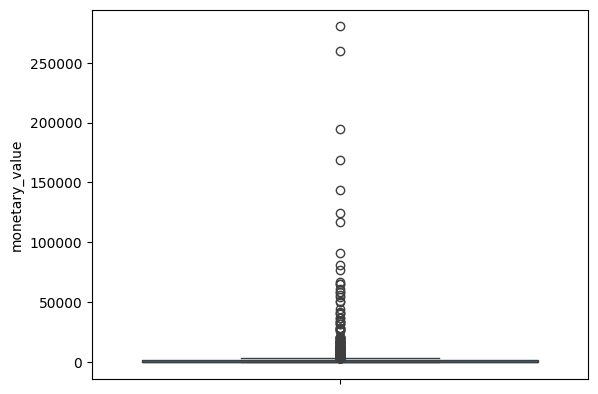

In [21]:
# monetary_value outliers
sns.boxplot(grouped_df['monetary_value'])
plt.show()

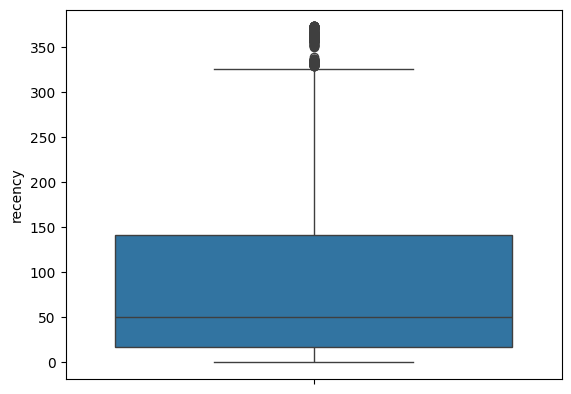

In [22]:
# recency outliers
sns.boxplot(grouped_df['recency'])
plt.show()

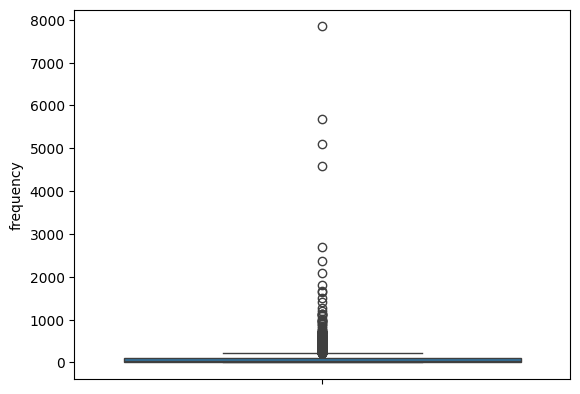

In [23]:
# frequency outliers
sns.boxplot(grouped_df['frequency'])
plt.show()

In [24]:
def udf_outlier_removal(df, column, iqr_multiplier=1.5):
    """
    Removes outliers from a column using the standard IQR method.
    
    df: pandas.DataFrame, input DataFrame.
    column: str, the column to remove outliers from.
    iqr_multiplier: float, optional, default 1.5, multiplier for IQR.
    
    Returns: pandas.DataFrame with outliers removed.
    """
    print(f"Processing column: {column}")
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    
    # Count outliers before removing
    outliers_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    print(f"Identified {outliers_count} outliers to remove.")
    
    # Filter out rows with values outside the bounds
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_cleaned

def check_outlier_removal(original_df: pd.DataFrame, cleaned_df: pd.DataFrame, column: str):
    """
    Compares and visualizes a column's distribution before and after outlier removal.
    """
    print("--- Descriptive Statistics ---")
    print(f"\nBefore outlier removal for '{column}':")
    print(original_df[column].describe())
    
    print(f"\nAfter outlier removal for '{column}':")
    print(cleaned_df[column].describe())
    
    print("\n--- Visual Comparison (Box Plots) ---")
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=original_df[column])
    plt.title(f"Before Outlier Removal\n(Column: '{column}')")
    plt.ylabel("Value")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=cleaned_df[column])
    plt.title(f"After Outlier Removal\n(Column: '{column}')")
    plt.ylabel("Value")
    
    plt.suptitle(f"Outlier Analysis for '{column}'", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


Saved the original dataframe for comparison.
Shape of original dataframe: (4338, 4)
Processing column: monetary_value
Identified 427 outliers to remove.
Processing column: recency
Identified 81 outliers to remove.
Processing column: frequency
Identified 244 outliers to remove.
Applied outlier removal.
Shape of cleaned dataframe: (3586, 4)


--- Verifying Outlier Removal for 'monetary_value' ---
--- Descriptive Statistics ---

Before outlier removal for 'monetary_value':
count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: monetary_value, dtype: float64

After outlier removal for 'monetary_value':
count    3586.000000
mean      815.559864
std       759.195115
min         3.750000
25%       272.107500
50%       547.040000
75%      1101.702500
max      3683.860000
Name: monetary_value, dtype: float64

--- Visual Comparison (Box Plots) ---


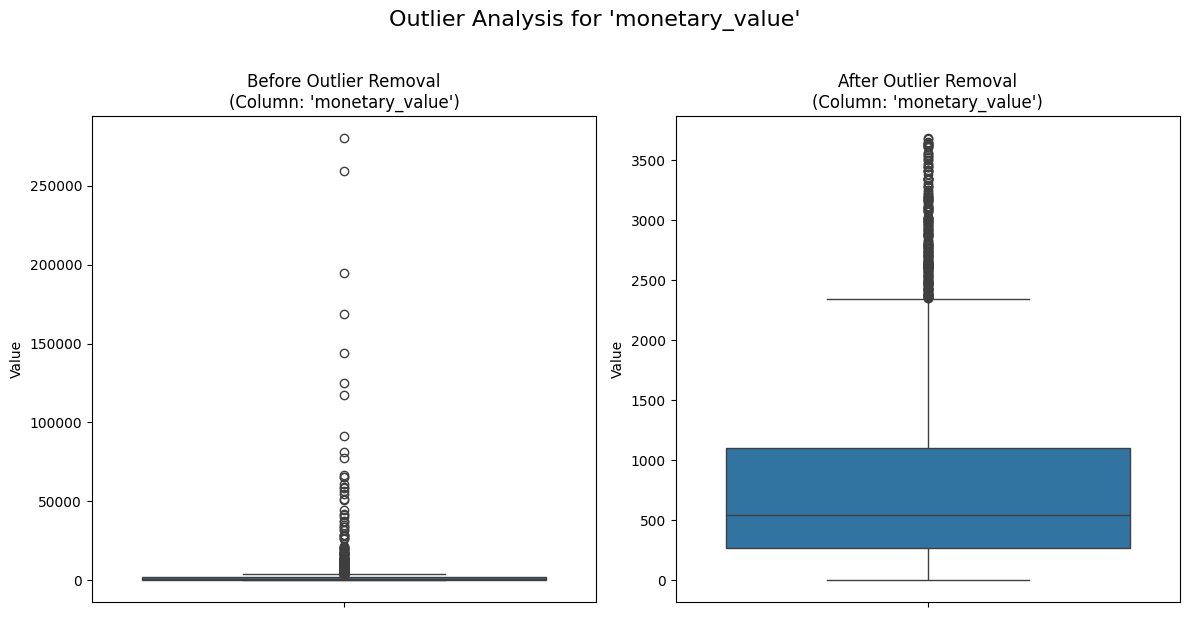



--- Verifying Outlier Removal for 'recency' ---
--- Descriptive Statistics ---

Before outlier removal for 'recency':
count    4338.000000
mean       91.536422
std       100.014169
min         0.000000
25%        17.000000
50%        50.000000
75%       141.000000
max       373.000000
Name: recency, dtype: float64

After outlier removal for 'recency':
count    3586.000000
mean       97.591188
std        95.845486
min         0.000000
25%        22.000000
50%        59.000000
75%       156.750000
max       361.000000
Name: recency, dtype: float64

--- Visual Comparison (Box Plots) ---


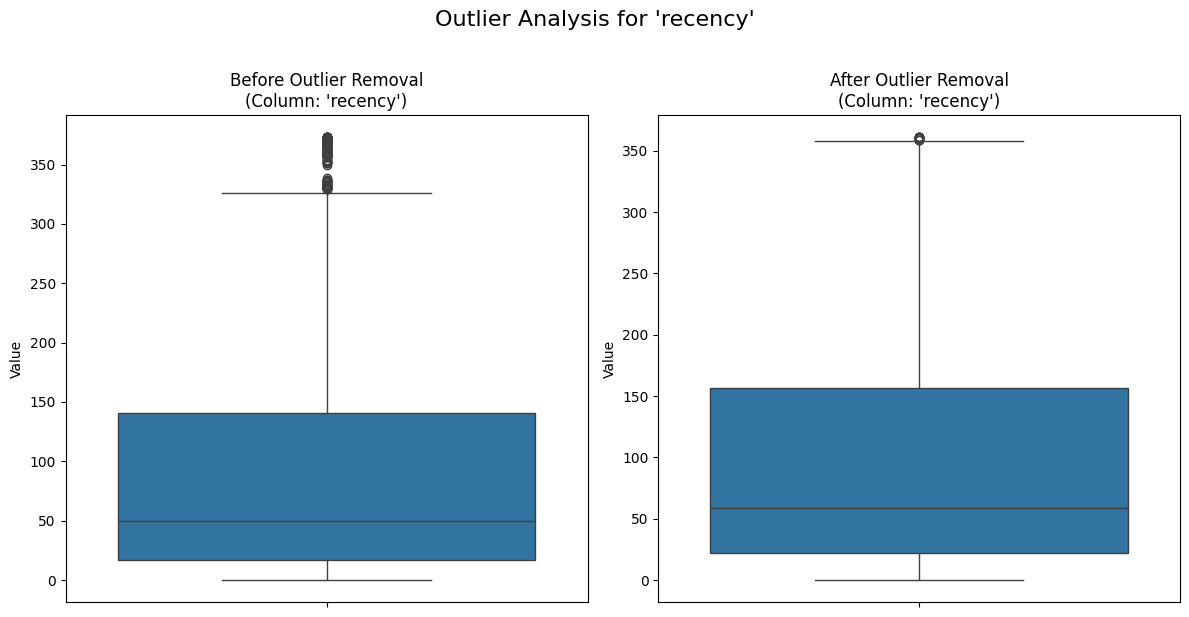



--- Verifying Outlier Removal for 'frequency' ---
--- Descriptive Statistics ---

Before outlier removal for 'frequency':
count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: frequency, dtype: float64

After outlier removal for 'frequency':
count    3586.000000
mean       46.916062
std        41.398009
min         1.000000
25%        15.000000
50%        32.000000
75%        69.000000
max       178.000000
Name: frequency, dtype: float64

--- Visual Comparison (Box Plots) ---


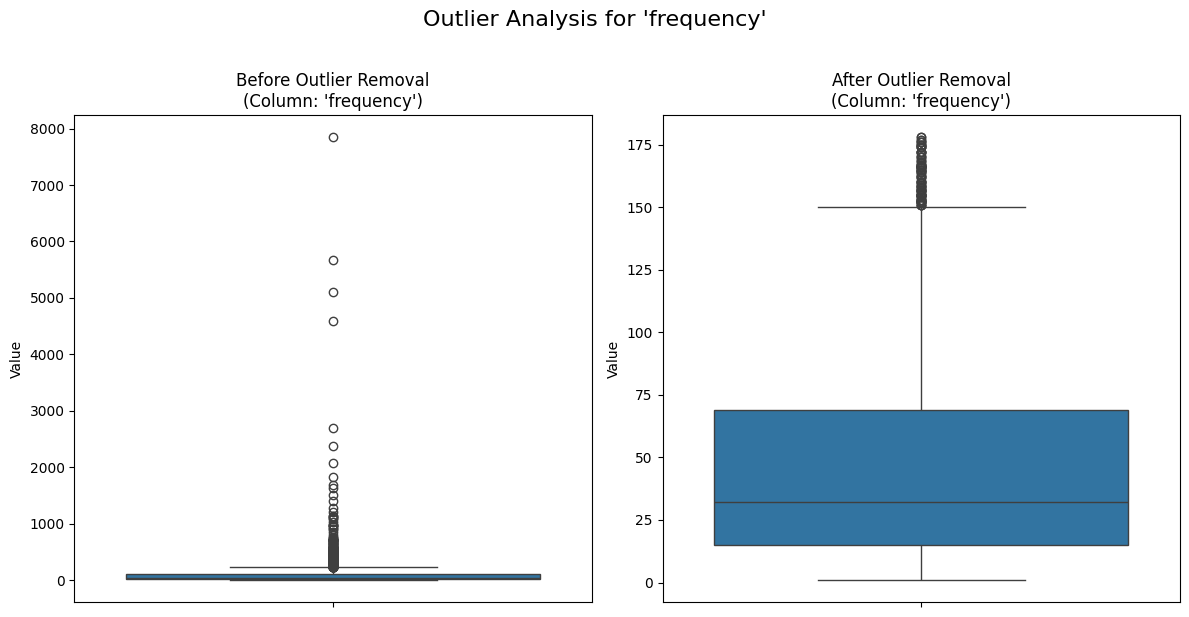

In [25]:
# 1. Create a copy of the dataframe BEFORE removing outliers. This is our "before" snapshot.
grouped_df_original = grouped_df.copy()
print("Saved the original dataframe for comparison.")
print("Shape of original dataframe:", grouped_df_original.shape)

# 2. Apply your outlier removal functions just as you did before.
# This modifies the 'grouped_df' dataframe. This is our "after" snapshot.
grouped_df = udf_outlier_removal(grouped_df, 'monetary_value')
grouped_df = udf_outlier_removal(grouped_df, 'recency')
grouped_df = udf_outlier_removal(grouped_df, 'frequency')
print("Applied outlier removal.")
print("Shape of cleaned dataframe:", grouped_df.shape)


# 3. NOW, CALL THE CHECKING FUNCTION to see the results.
# We compare the "before" (grouped_df_original) with the "after" (grouped_df).

print("\n\n--- Verifying Outlier Removal for 'monetary_value' ---")
check_outlier_removal(original_df=grouped_df_original, cleaned_df=grouped_df, column='monetary_value')

print("\n\n--- Verifying Outlier Removal for 'recency' ---")
check_outlier_removal(original_df=grouped_df_original, cleaned_df=grouped_df, column='recency')

print("\n\n--- Verifying Outlier Removal for 'frequency' ---")
check_outlier_removal(original_df=grouped_df_original, cleaned_df=grouped_df, column='frequency')



In [26]:
rfm_df = grouped_df[['monetary_value', 'frequency', 'recency']]
rfm_df.shape

(3586, 3)

### Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
# instantiate
scaler = StandardScaler()

# fit and transform
rfm_scaled = scaler.fit_transform(rfm_df)
rfm_scaled.shape

(3586, 3)

In [29]:
# convert to df
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['monetary_value', 'frequency', 'recency']
rfm_scaled.head()

,monetary_value,frequency,recency
0,1.293234,-0.384518,-0.246172
1,1.240948,0.630165,-0.830527
2,-0.633865,-0.722746,2.206033
3,2.226985,0.920074,-0.653134
4,-0.957147,-1.036814,1.099932


# 5. Modelling

In [30]:
from sklearn.cluster import KMeans

In [31]:
# k-means with arbitrary k value
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=4)

In [32]:
kmeans.labels_

array([0, 0, 1, ..., 1, 2, 0], dtype=int32)

### 5.1 Optimal Number of Clusters

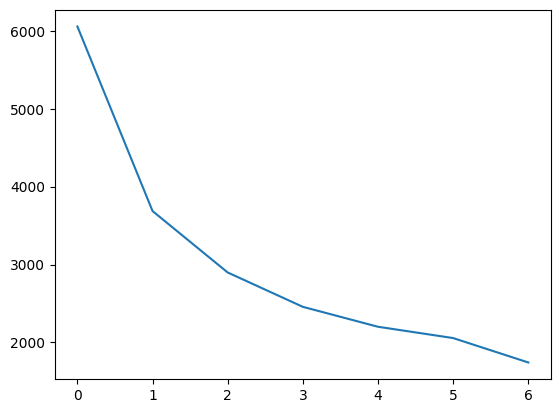

In [33]:
# elbow curve // sum of square distances (ssd)
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_scaled)

    ssd.append(kmeans.inertia_)

# plot SSDs (inertia) for each n_clusters
plt.plot(ssd)
plt.show()

### 5.2 Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [34]:
# silhouette score analysis

range_n_clusters = [2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:

    # initialize kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    print(f'For n_clusters = {num_clusters}, the silhouette score is {silhouette_avg}')


For n_clusters = 2, the silhouette score is 0.42707755685494364
For n_clusters = 3, the silhouette score is 0.4402082474798128
For n_clusters = 4, the silhouette score is 0.41001166430902913
For n_clusters = 5, the silhouette score is 0.3418181919974911
For n_clusters = 6, the silhouette score is 0.35778373182647716
For n_clusters = 7, the silhouette score is 0.3623233374162776
For n_clusters = 8, the silhouette score is 0.3411186975579562


**OBSERVATION**-
- From above results we can see that `n_clusters = 3` seems to be the optimal cluster count.
- In some runs, n_clusters = 2 seems to give highest silhouette score but depending on businss requirement, 2 clusters might be too few.

### 5.3 Final Model with k=3

In [35]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=3)

In [36]:
kmeans.labels_

array([0, 1, 2, ..., 2, 0, 1], dtype=int32)

In [37]:
kmeans.labels_.shape

(3586,)

### Assign the Labels

In [38]:
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,CustomerID,recency,frequency,monetary_value,cluster_id
2,12348.0,74,31.0,1797.24,0
3,12349.0,18,73.0,1757.55,1
4,12350.0,309,17.0,334.40,2
5,12352.0,35,85.0,2506.04,1
6,12353.0,203,4.0,89.00,2


In [39]:
grouped_df.shape

(3586, 5)

### Boxplots for each feature

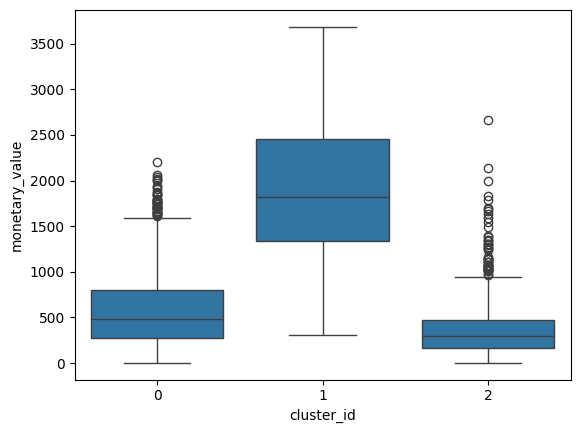

In [40]:
sns.boxplot(x='cluster_id', y='monetary_value', data=grouped_df)
plt.show()

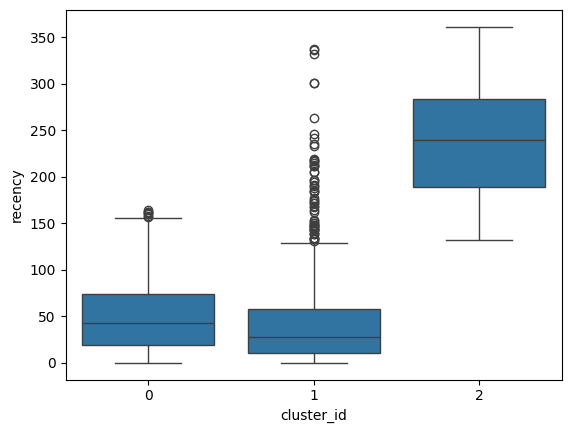

In [41]:
sns.boxplot(x='cluster_id', y='recency', data=grouped_df)
plt.show()

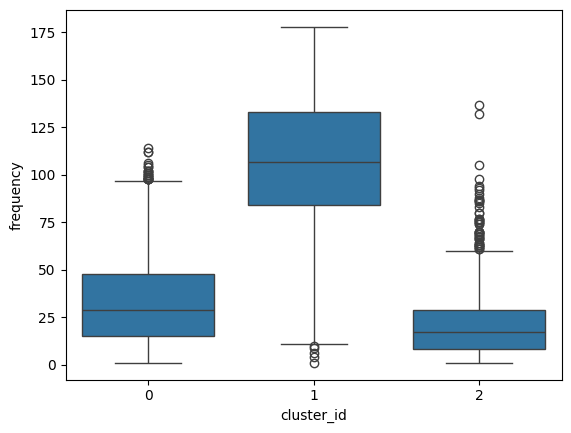

In [42]:
sns.boxplot(x='cluster_id', y='frequency', data=grouped_df)
plt.show()

### 5.4 Interactive 3-D Plot of the K-Means Clusters

In [43]:
import plotly.express as px

# Create 3D scatter plot using Plotly
fig = px.scatter_3d(grouped_df, x='monetary_value', y='recency', z='frequency',
                    color='cluster_id',  # Color by cluster
                    title="3D Interactive Cluster Plot",
                    labels={'monetary_value': 'Revenue', 'recency': 'Recency', 'frequency': 'Frequency'},
                    opacity=0.99, color_continuous_scale='viridis_r')

# Set the figure size (width, height) and background color
fig.update_layout(
    width=800,  # Width of the plot
    height=800,  # Height of the plot
    plot_bgcolor='rgb(28, 28, 28)',  # Dark background for the plot
    paper_bgcolor='rgb(28, 28, 28)',  # Dark background for the entire paper
    font=dict(color='white')  # White font color for visibility
)

# Show the plot
fig.show()


#### Image Saved inside 'Visualizations' Folder.
![K-Means Plot](visualizations/kmeans_3d_plot.png)

The K-Means algorithm effectively groups customers into three actionable segments based on their RFM (Recency, Frequency, Monetary) scores.

### Cluster 0 (Purple): The High-Value, Loyal Customers (Champions)

*   **Identity:** These are the best customers, defined by high frequency, high spending, and low recency (they've purchased recently). They represent the loyal core of the business.
*   **Actionable Insights:** Reward them with a VIP/loyalty program. Use personalized communication instead of generic promotions and seek their feedback for service improvements.

### Cluster 1 (Yellow): The Recent, Promising Customers (Potential Loyalists)

*   **Identity:** This group's defining trait is their recent purchasing activity (low recency), but they currently have low-to-mid frequency and spending. They are a key growth opportunity.
*   **Actionable Insights:** The goal is to increase their loyalty. Encourage repeat purchases with follow-up offers and personalized product recommendations to build buying habits.

### Cluster 2 (Teal/Green): The At-Risk / Lapsed Customers

*   **Identity:** This segment requires re-engagement. They are defined by high recency (it has been a long time since their last purchase) and low frequency and revenue.
*   **Actionable Insights:** Target them with "We Miss You!" win-back campaigns that include special offers. Use low-cost channels like email and survey them to understand the reasons for churn.


### **Overall Conclusion from the Plot**

The K-Means algorithm has done an excellent job of creating three distinct and, most importantly, **actionable** customer segments. The visualization clearly separates the **"Best Customers" (purple)**, the **"New/Potential Customers" (yellow)**, and the **"Lapsed Customers" (teal)**, allowing the business to design highly targeted and efficient marketing strategies for each.

# 6. Hierarchical Clustering

In [44]:
rfm_scaled.head()

,monetary_value,frequency,recency
0,1.293234,-0.384518,-0.246172
1,1.240948,0.630165,-0.830527
2,-0.633865,-0.722746,2.206033
3,2.226985,0.920074,-0.653134
4,-0.957147,-1.036814,1.099932


In [45]:
grouped_df.head()

,CustomerID,recency,frequency,monetary_value,cluster_id
2,12348.0,74,31.0,1797.24,0
3,12349.0,18,73.0,1757.55,1
4,12350.0,309,17.0,334.40,2
5,12352.0,35,85.0,2506.04,1
6,12353.0,203,4.0,89.00,2


### 6.1 Single Linkage

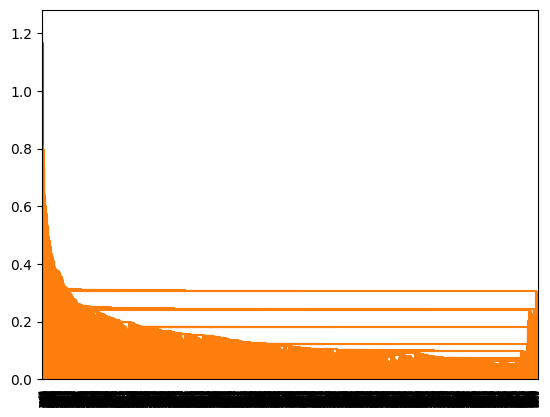

In [46]:
mergings = linkage(rfm_scaled, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

### 6.2 Complete Linkage

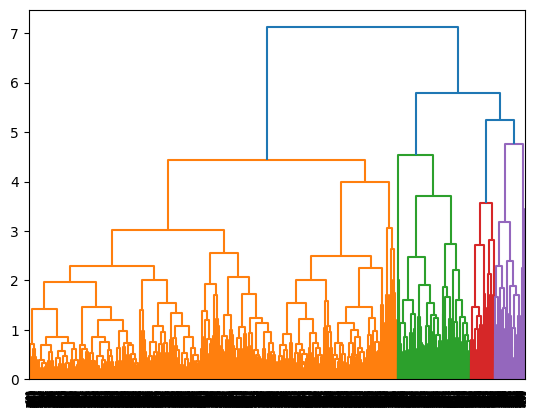

In [47]:
mergings = linkage(rfm_scaled, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

In [48]:
# 3 clusters
cut_tree(mergings, n_clusters=3).shape

(3586, 1)

In [49]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 2, ..., 2, 2, 1])

In [50]:
cluster_labels.shape

(3586,)

### Assign Cluster Labels

In [51]:
grouped_df['cluster_labels'] = cluster_labels
grouped_df.head()

,CustomerID,recency,frequency,monetary_value,cluster_id,cluster_labels
2,12348.0,74,31.0,1797.24,0,0
3,12349.0,18,73.0,1757.55,1,1
4,12350.0,309,17.0,334.40,2,2
5,12352.0,35,85.0,2506.04,1,0
6,12353.0,203,4.0,89.00,2,2


##### cluster_id vs cluster_labels
- cluster_id - assigned through k-means
- cluster_labels - assigned through hierarchical clustering

### 6.3 Plots

<Axes: xlabel='cluster_labels', ylabel='monetary_value'>

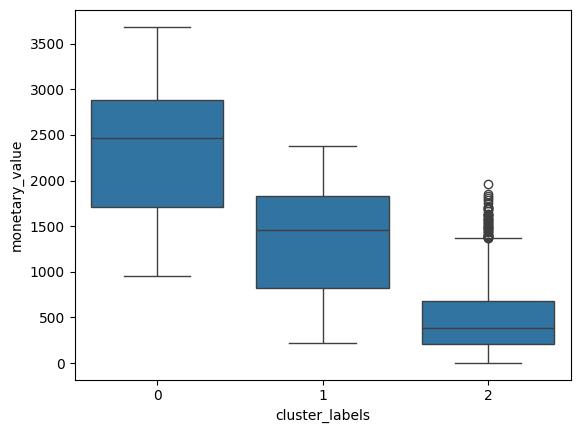

In [52]:
sns.boxplot(x='cluster_labels', y='monetary_value', data=grouped_df, orientation='vertical')

<Axes: xlabel='cluster_labels', ylabel='frequency'>

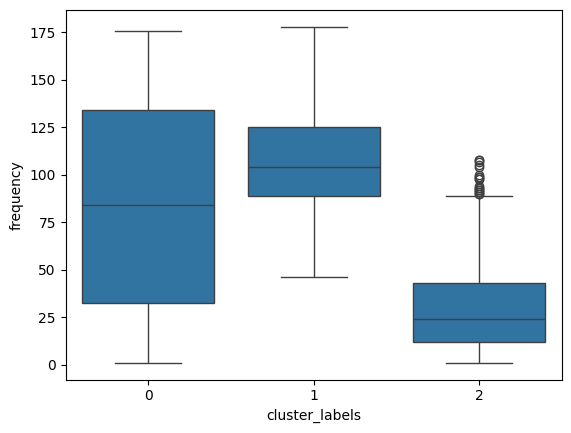

In [53]:
sns.boxplot(x='cluster_labels', y='frequency', data=grouped_df, orientation='vertical')

<Axes: xlabel='cluster_labels', ylabel='recency'>

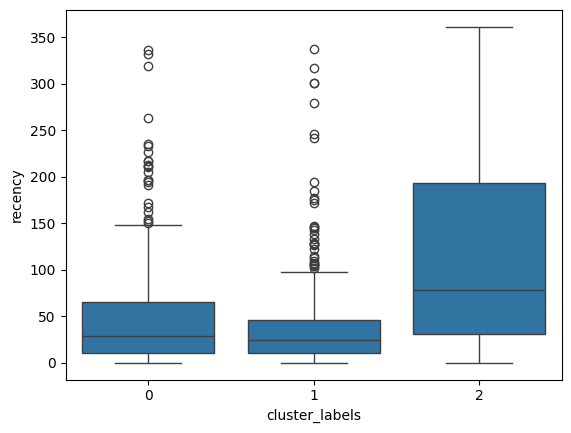

In [54]:
sns.boxplot(x='cluster_labels', y='recency', data=grouped_df, orientation='vertical')

### 6.4 Hierarchical Cluster 3D Plot

In [55]:
import plotly.express as px

# Create 3D scatter plot using Plotly
fig = px.scatter_3d(grouped_df, x='monetary_value', y='recency', z='frequency',
                    color='cluster_labels',  # Color by cluster
                    title="3D Interactive Cluster Plot",
                    labels={'monetary_value': 'Revenue', 'recency': 'Recency', 'frequency': 'Frequency'},
                    opacity=0.99, color_continuous_scale='viridis_r')

# Set the figure size (width, height) and background color
fig.update_layout(
    width=800,  
    height=800,  
    plot_bgcolor='rgb(28, 28, 28)',  # background for the plot
    paper_bgcolor='rgb(28, 28, 28)',  # background for the entire paper
    font=dict(color='white')  # font color for visibility
)

# Show the plot
fig.show()

#### Image Saved inside 'Visualizations' Folder. 
![Hierarchical Plot](visualizations/hierarchical_3d_plot.png)

Hierarchical Clustering produced unique segments by prioritizing spending patterns over recency, offering a different perspective than K-Means.

### Cluster 0 (Purple): The Big Spenders

*   **Identity:** These customers are defined by high revenue and moderate-to-high frequency. Critically, this group contains both active and lapsed customers, as they are spread across the entire recency axis.
*   **Actionable Insight:** This group must be sub-segmented by recency. Target active big spenders with VIP programs and lapsed ones with high-incentive "we miss you" campaigns to win back these valuable lost customers.

### Cluster 1 (Yellow): Low-Value, Occasional Shoppers

*   **Identity:** Characterized by the lowest spending and frequency, this group is spread across all recency values.
*   **Actionable Insight:** Minimize marketing investment. Use low-cost, automated communication (e.g., general newsletters) and only target the most recent buyers for a potential second purchase.

### Cluster 2 (Teal/Green): The Active & Frequent Regulars

*   **Identity:** Their defining trait is high frequency, while their spending is in the low-to-mid range. They are generally recent shoppers and represent the loyal backbone of the business.
*   **Actionable Insight:** The primary goal is to increase their Average Order Value (AOV). Target them with bundles, upsells, and "free shipping" thresholds to encourage larger purchases and nurture their loyalty.


### **Actionable Insights & Recommendations:**
*   **Increase Average Order Value (AOV):** The main goal for this segment is to get them to spend more per visit.
*   **Promote Bundles & Upsells:** Offer them "3 for 2" deals, product bundles, or a "spend $X more to get free shipping" incentive.
*   **Nurture their Loyalty:** They are clearly fans of the brand. Keep them engaged with content and community-building initiatives. They are your brand advocates.

### **Overall Conclusion: K-Means vs. Hierarchical**

This is a classic comparison of clustering outcomes:

*   **K-Means (Previous Plot):** Created segments that were highly intuitive for **time-based marketing**. It cleanly separated customers into "Champions," "Potential," and "At-Risk" based largely on their **recency**. This is often more immediately useful for a marketing team.
*   **Hierarchical Clustering (This Plot):** Ignored recency as the primary separator and instead created segments based on **spending behavior**. It gave you "Big Spenders," "Frequent Regulars," and "Low-Value Shoppers."

---

### **Final Analysis and Recommendations**

This project successfully employed two distinct clustering techniques, K-Means and Hierarchical Clustering, to segment the customer base into meaningful groups, directly addressing the primary objective of enabling targeted marketing. The analysis of both models provides a comprehensive view of the customer landscape, offering insights for both immediate tactical campaigns and long-term business strategy.

**The K-Means model excelled at creating highly actionable, time-sensitive segments:**

*   **Champions (High-Value & Recent):** This group represents the most valuable customers, making them ideal targets for loyalty programs and personalized engagement to reinforce their behavior.
*   **Potential Loyalists (Recent & Developing):** These are new or recently engaged customers. Marketing efforts should focus on onboarding and encouraging repeat purchases to increase their lifetime value.
*   **At-Risk Customers (Lapsed):** This segment consists of customers who have not purchased in a long time. They are prime candidates for targeted win-back campaigns designed to re-engage their interest.

This segmentation directly supports the goal of designing specific marketing campaigns for different customer lifecycle stages.

**The Hierarchical Clustering model provided a strategic overview based on purchasing power and loyalty:**

*   **Big Spenders (High Revenue):** This group, containing both active and lapsed customers, holds the highest revenue potential. This insight is critical for high-stakes retention efforts.
*   **Loyal Regulars (High Frequency):** A key discovery, this segment consists of customers who purchase very frequently but spend moderately. They are the brand's most engaged advocates and represent a significant opportunity for upselling and increasing average order value. This directly informs inventory planning for high-frequency items.
*   **Low-Engagement Shoppers (Low Value):** This group allows the business to optimize marketing spend by minimizing efforts on customers with low lifetime value potential.

### **Conclusion**

By leveraging the insights from both models, the retailer can move beyond a one-size-fits-all approach. The **K-Means segmentation** provides a clear, tactical framework for day-to-day marketing actions focused on customer retention and growth. Simultaneously, the **Hierarchical segmentation** offers a strategic lens to understand the fundamental value and behavior patterns within the customer base, guiding long-term decisions on product offerings, inventory management, and loyalty program design. Together, they provide a powerful, data-driven foundation to enhance customer relationships, drive sales, and optimize overall business strategy.